

> Dimension/8



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/catsdogs_dct/train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/catsdogs_dct/test'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Görüntülenen çıkış son 5000 satıra kısaltıldı.
/content/drive/MyDrive/Colab Notebooks/catsdogs_dct/test/cats/cat.1945.jpg
/content/drive/MyDrive/Colab Notebooks/catsdogs_dct/test/cats/cat.11446.jpg
/content/drive/MyDrive/Colab Notebooks/catsdogs_dct/test/cats/cat.2059.jpg
/content/drive/MyDrive/Colab Notebooks/catsdogs_dct/test/cats/cat.556.jpg
/content/drive/MyDrive/Colab Notebooks/catsdogs_dct/test/cats/cat.2673.jpg
/content/drive/MyDrive/Colab Notebooks/catsdogs_dct/test/cats/cat.10564.jpg
/content/drive/MyDrive/Colab Notebooks/catsdogs_dct/test/cats/cat.1045.jpg
/content/drive/MyDrive/Colab Notebooks/catsdogs_dct/test/cats/cat.5320.jpg
/content/drive/MyDrive/Colab Notebooks/catsdogs_dct/test/cats/cat.1451.jpg
/content/drive/MyDrive/Colab Notebooks/catsdogs_dct/test/cats/cat.10485.jpg
/content/drive/MyDrive/Colab Notebooks/catsdogs_dct/test/cats/cat.10154.jpg
/content/drive/MyDrive/Colab Notebooks/catsdogs_dct/test/cats/cat.2394.jpg
/content/drive/MyDrive/Colab Notebooks/catsdogs_dc

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
import time

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/catsdogs_dct/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/catsdogs_dct/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 23000 images belonging to 2 classes.
Found 7000 images belonging to 2 classes.


In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# epoch 30 V3
start = time.time()

history = cnn.fit(x = training_set, validation_data = test_set, epochs = 30)

print("Total time: ", time.time() - start, "seconds")

Epoch 1/30
719/719 [==============================] - 4092s 6s/step - loss: 0.6925 - accuracy: 0.5283 - val_loss: 0.6795 - val_accuracy: 0.5756
Epoch 2/30
719/719 [==============================] - 103s 143ms/step - loss: 0.6753 - accuracy: 0.5790 - val_loss: 0.6552 - val_accuracy: 0.6173
Epoch 3/30
719/719 [==============================] - 99s 138ms/step - loss: 0.6572 - accuracy: 0.6080 - val_loss: 0.6379 - val_accuracy: 0.6369
Epoch 4/30
719/719 [==============================] - 95s 131ms/step - loss: 0.6471 - accuracy: 0.6191 - val_loss: 0.6330 - val_accuracy: 0.6441
Epoch 5/30
719/719 [==============================] - 97s 135ms/step - loss: 0.6393 - accuracy: 0.6316 - val_loss: 0.6452 - val_accuracy: 0.6296
Epoch 6/30
719/719 [==============================] - 96s 133ms/step - loss: 0.6357 - accuracy: 0.6314 - val_loss: 0.6340 - val_accuracy: 0.6414
Epoch 7/30
719/719 [==============================] - 94s 130ms/step - loss: 0.6289 - accuracy: 0.6398 - val_loss: 0.6242 - val_ac

In [ ]:
# Save entire model to a HDF5 file
cnn.save("/content/drive/MyDrive/Colab Notebooks/classification_with_dctV3.h5")

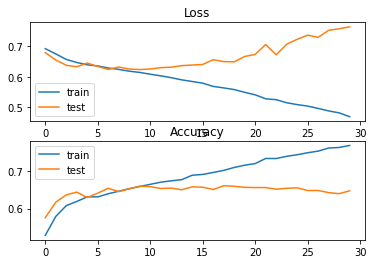

In [ ]:
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Text(0.5, 1.0, 'Accuracy Curves')

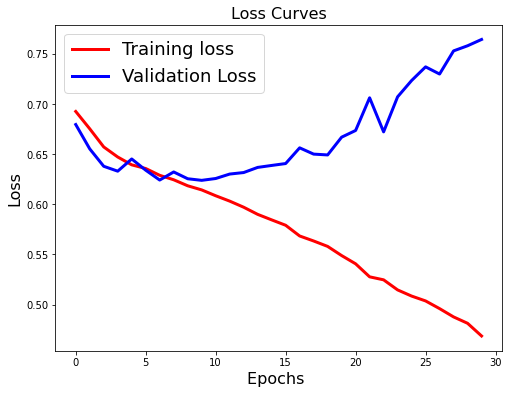

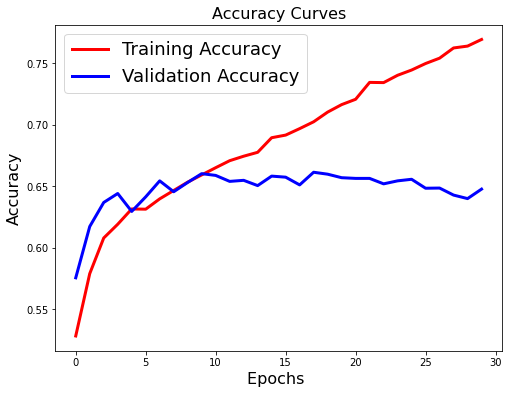

In [ ]:
# graphs with different colors..
#Plot the Graph
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
  
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


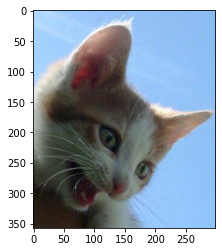

/content/drive/MyDrive/Colab Notebooks/catsdogs/demo_test/cat1.jpg
1/1 [==============================] - 0s 106ms/step
1
cat


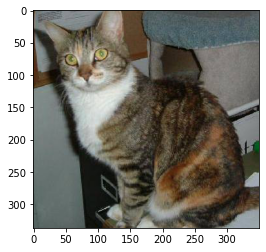

/content/drive/MyDrive/Colab Notebooks/catsdogs/demo_test/cat2.jpg
1/1 [==============================] - 0s 21ms/step
2
dog


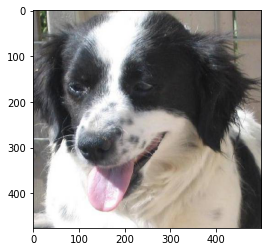

/content/drive/MyDrive/Colab Notebooks/catsdogs/demo_test/dog1.jpg
1/1 [==============================] - 0s 20ms/step
3
cat


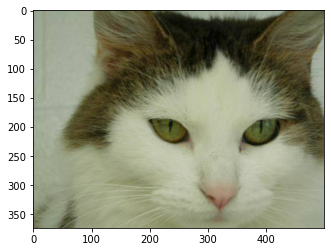

/content/drive/MyDrive/Colab Notebooks/catsdogs/demo_test/cat3.jpg
1/1 [==============================] - 0s 20ms/step
4
cat


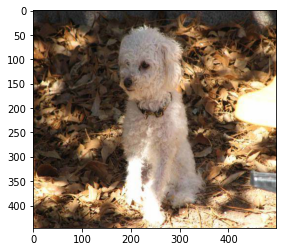

/content/drive/MyDrive/Colab Notebooks/catsdogs/demo_test/dog3.jpg
1/1 [==============================] - 0s 20ms/step
5
dog


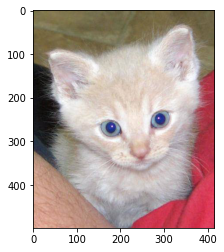

/content/drive/MyDrive/Colab Notebooks/catsdogs/demo_test/cat4.jpg
1/1 [==============================] - 0s 19ms/step
6
cat


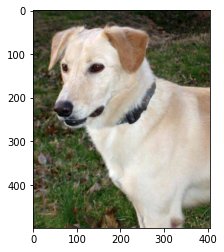

/content/drive/MyDrive/Colab Notebooks/catsdogs/demo_test/dog2.jpg
1/1 [==============================] - 0s 20ms/step
7
cat


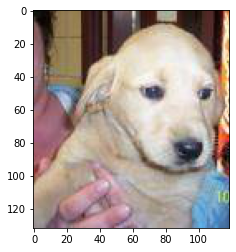

/content/drive/MyDrive/Colab Notebooks/catsdogs/demo_test/dog4.jpg
1/1 [==============================] - 0s 20ms/step
8
cat


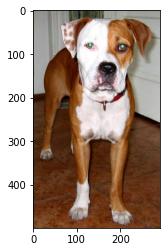

/content/drive/MyDrive/Colab Notebooks/catsdogs/demo_test/dog5.jpg
1/1 [==============================] - 0s 20ms/step
9
cat


In [ ]:
import numpy as np
import keras
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import os
 

demo_test = "/content/drive/MyDrive/Colab Notebooks/catsdogs/demo_test"
folder_dir = "/content/drive/MyDrive/Colab Notebooks/catsdogs/demo_test"
temp = 0
for demo_image in os.listdir(demo_test):
  #print(demo_image)
  tempPath = os.path.join(folder_dir, demo_image)
  image = mpimg.imread(tempPath)
  plt.imshow(image)
  plt.show()
  print(tempPath)
  image = keras.utils.load_img(tempPath, target_size = (64, 64))
  image = img_to_array(image)
  image = np.expand_dims(image, axis = 0)
  result = cnn.predict(image)
  training_set.class_indices
  temp = temp+1
  print(temp)
  if result[0][0] == 1:
    prediction = 'dog'
  else:
    prediction = 'cat'
  print(prediction)
